# Архитектура **BERT** и примеры применения
## ***Содержание:***
### **1.**   **Возможности Bert и какие задачи решает**
### **2.**   **Предшественники BERT (ELMO, ...). Почему Word Embeddings лучше классических векторных представлений**
### **3.**   **Немного о трансформерной архитектуре. Как работает BERT?**
### **4.**   **Примеры применения**



## ***1. Возможности Bert и какие задачи решает***

*   Классификация предложений
*   Анализ тональности (sentiment analysis)
    *   Вход: отзыв на фильм/продукт. Выход: положительная/отрицательная тональность
    Пример набора данных: SST
    *   Проверка фактов (fact-checking):
    Вход: предложение. Выход: «утверждение» (Claim) или «не утверждение» (Not Claim)
    Более амбициозный/футуристичный пример:
    *   Вход: предложение с утверждением (Claim sentence). Выход: «Правда» или «Ложь»
    *   Full Fact – организация, разрабатывающая автоматические фактчекеры для общественной пользы. Частью их пайплайна является классификатор, который читает новостные статьи и распознает сомнительные факты, которые затем могут быть проверены (пока человеком, позже, возможно, с помощью машинного обучения)
    *   Видео: Эмбеддинги предложений для автоматической проверки фактов
*   Выделение именованных сущностей (Named Entity Recognition)
*   Ответ на вопрос (Question Answering)

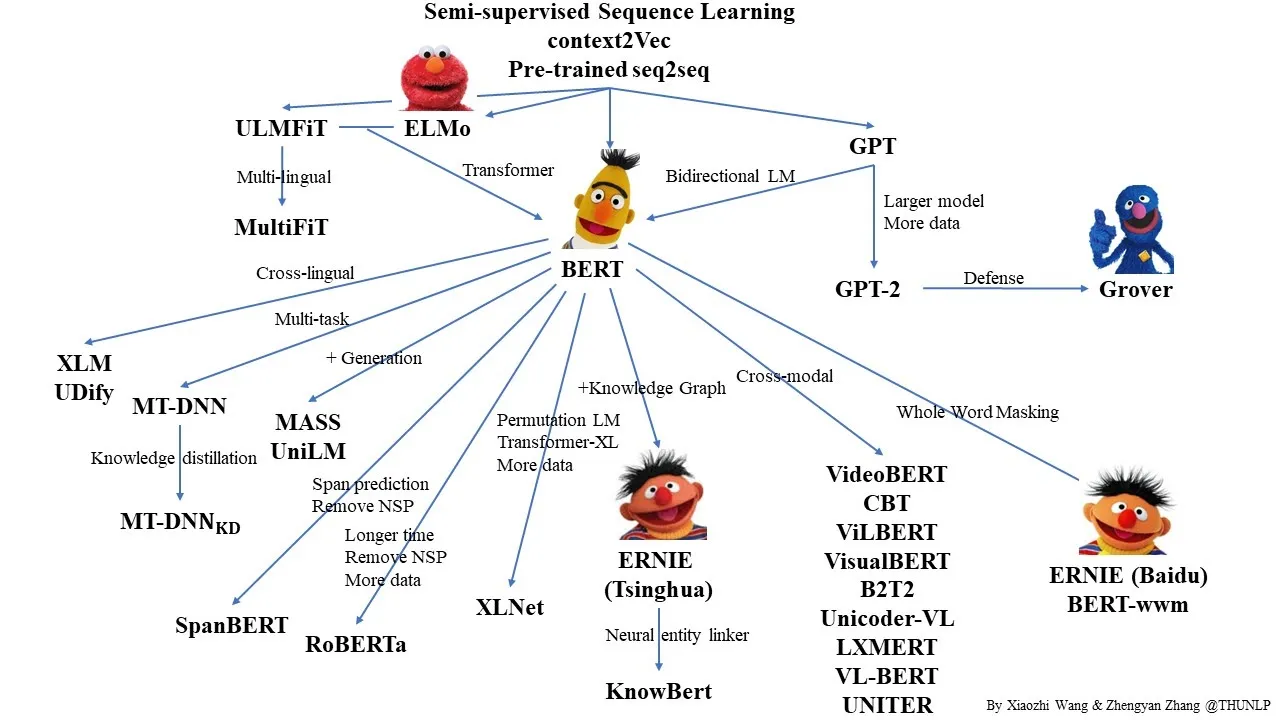

## **2. Предшественники BERT (ELMO, ...). Почему Word Embeddings лучше классических векторных представлений**

### ***Что такое эмбеддинги (Word Embeddings)?***

## Так выглядит пример эмбеддинга в GloVe для слова «stick» (где размерность эмбеддинга – 200 (может быть и 50 и 300)):

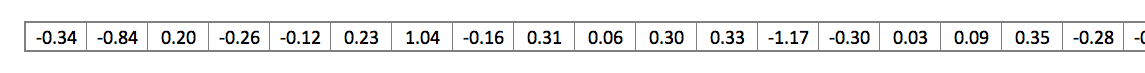

## [GloVe: Global Vectors for Word Representation](https://nlp.stanford.edu/projects/glove/)
## [RusVectōrēs: семантические модели для русского языка](https://rusvectores.org/ru/models/)

## Прежде чем говорить об **ELMo**, давайте подробно изучим эмбеддинги. Что такое эмбеддинг? **Эмбеддинг в глубоком обучении** — это дискретное и многомерное векторное представление в **n**-мерное пространство рациональных чисел. В **NLP** эмбеддинги обычно представляют собой просто таблицу сопоставления слов с векторами. Эмбеддинги бывают как из высокоразмерного пространства в низкоразмерное, так и наоборот, из низкоразмерного в высокоразмерное.

---
## Сам по себе **embedding** — это ***сопоставление*** произвольной сущности (например, узла в графе или кусочка картинки) некоторому вектору.



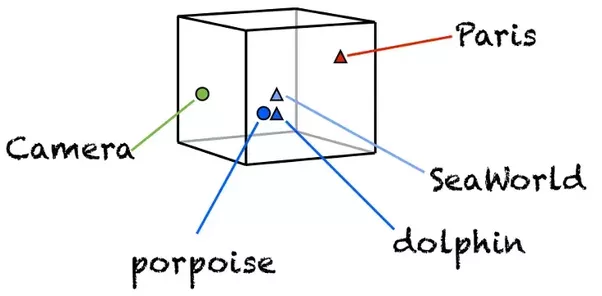

## **OHE**
## OHE все еще не обладает свойствами семантической близости

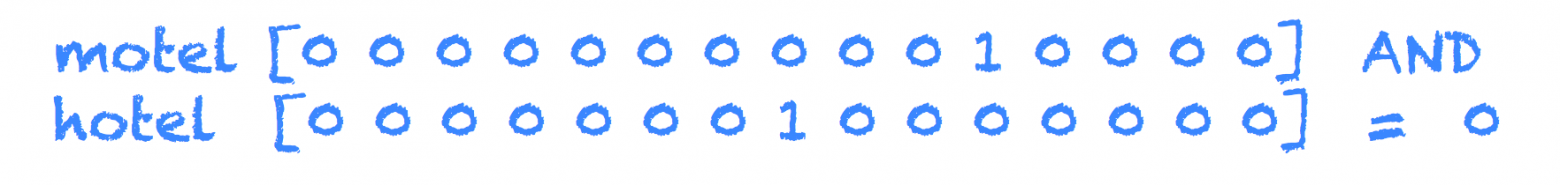

## **bag of words, BoW**

## Отойдем немного назад — значение одного слова нам может быть и не так важно, т.к. речь (и устная, и письменная) состоит из наборов слов, которые мы называем текстами. Так что если мы захотим как-то представить тексты, то мы возьмем OHE-вектор каждого слова в тексте и сложим вместе. Т.е. на выходе получим просто подсчет количества различных слов в тексте в одном векторе. Такой подход называется “мешок слов” (bag of words, BoW), потому что мы теряем всю информацию о взаимном расположении слов внутри текста.

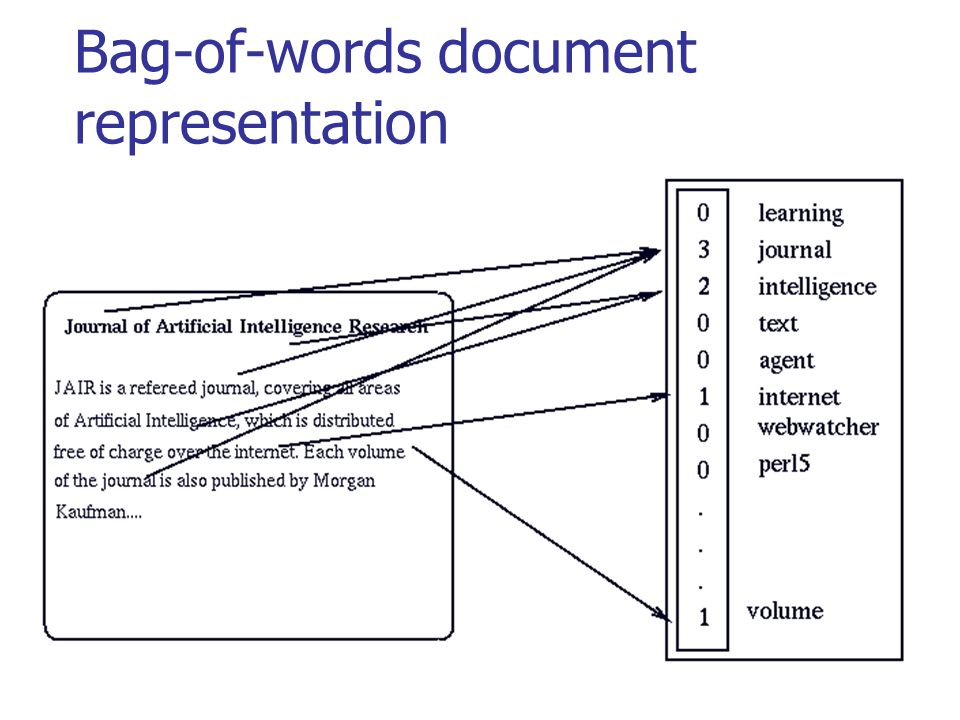

### Но несмотря на потерю этой информации так тексты уже можно сравнивать. Например, с помощью косинусной меры.

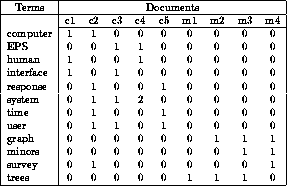

## **term-document**

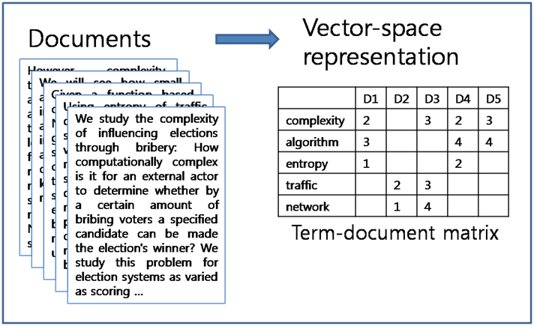

## **TF-IDF**
## Эта аббревиатура означает "term frequency — inverse document frequency".

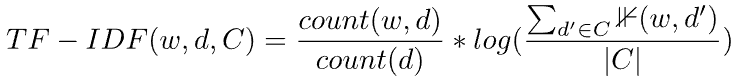

### Другая история в случае с [**ELMo**](https://arxiv.org/pdf/1802.05365.pdf). Это обычная языковая модель:

### ![](https://i.ibb.co/dpp00wG/elmo.png)  
### *From [Improving a Sentiment Analyzer using **ELMo** — Word Embeddings on Steroids](http://www.realworldnlpbook.com/blog/improving-sentiment-analyzer-using-elmo.html)*

### Но есть и отличия:
### **Во-первых**, эмбеддинги слов строятся с помощью сверточной сети над символами.

### **Во-вторых**, учится сразу две языковых модели, **forward** и backward, которые потом конкатенируются.

### **В-третьих**, смысл модели, что она выдает эмбеддинг слова с учетом его контекста. Это мог бы быть выход последнего слоя **LSTM**, но ребята поступили хитрее: для каждого слова у нас есть сразу несколько эмбеддингов: выходы каждого из слоев **LSTM** + выход сверточной сети над символами. При обучении итоговой модели под нужную задачу эмбеддинг слова считается как взвешенная сумма данных эмбеддингов. Веса учатся под задачу.

### В итоге, когда мы хотим использовать **ELMo** в своей модели, мы берем эту вот языковую модель и подставляем вместо наших обычных эмбеддингов. Всё, пара строчек изменений - но более хорошие и сильно более медленные эмбеддинги.

### Языковую модель можно доучивать под задачу - тогда придется дообучать все эти миллионы параметров, что медленно. А можно не доучивать - тогда внутри **ELMo** будет учится только **`(num_layers + 1)`** параметр - веса смеси эмбеддингов.

***Ссылки по теме:***
*   ### [Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habr.com/ru/company/ods/blog/329410/)

## **3. Немного о трансформерной архитектуре. Как работает BERT?**

## Релизная статья описывает две модели BERT'а разных размеров:


## BERT BASE (Базовая) – сравнимая по размерам и производительностью с OpenAI Transformer;
## BERT LARGE (Расширенная) – поистине громадная модель, которая достигла непревзойденных результатов (state of the art), описанных в статье.

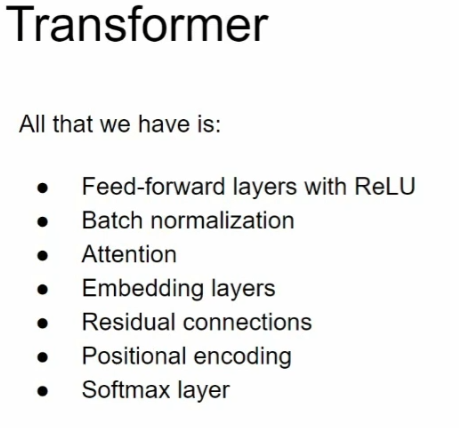

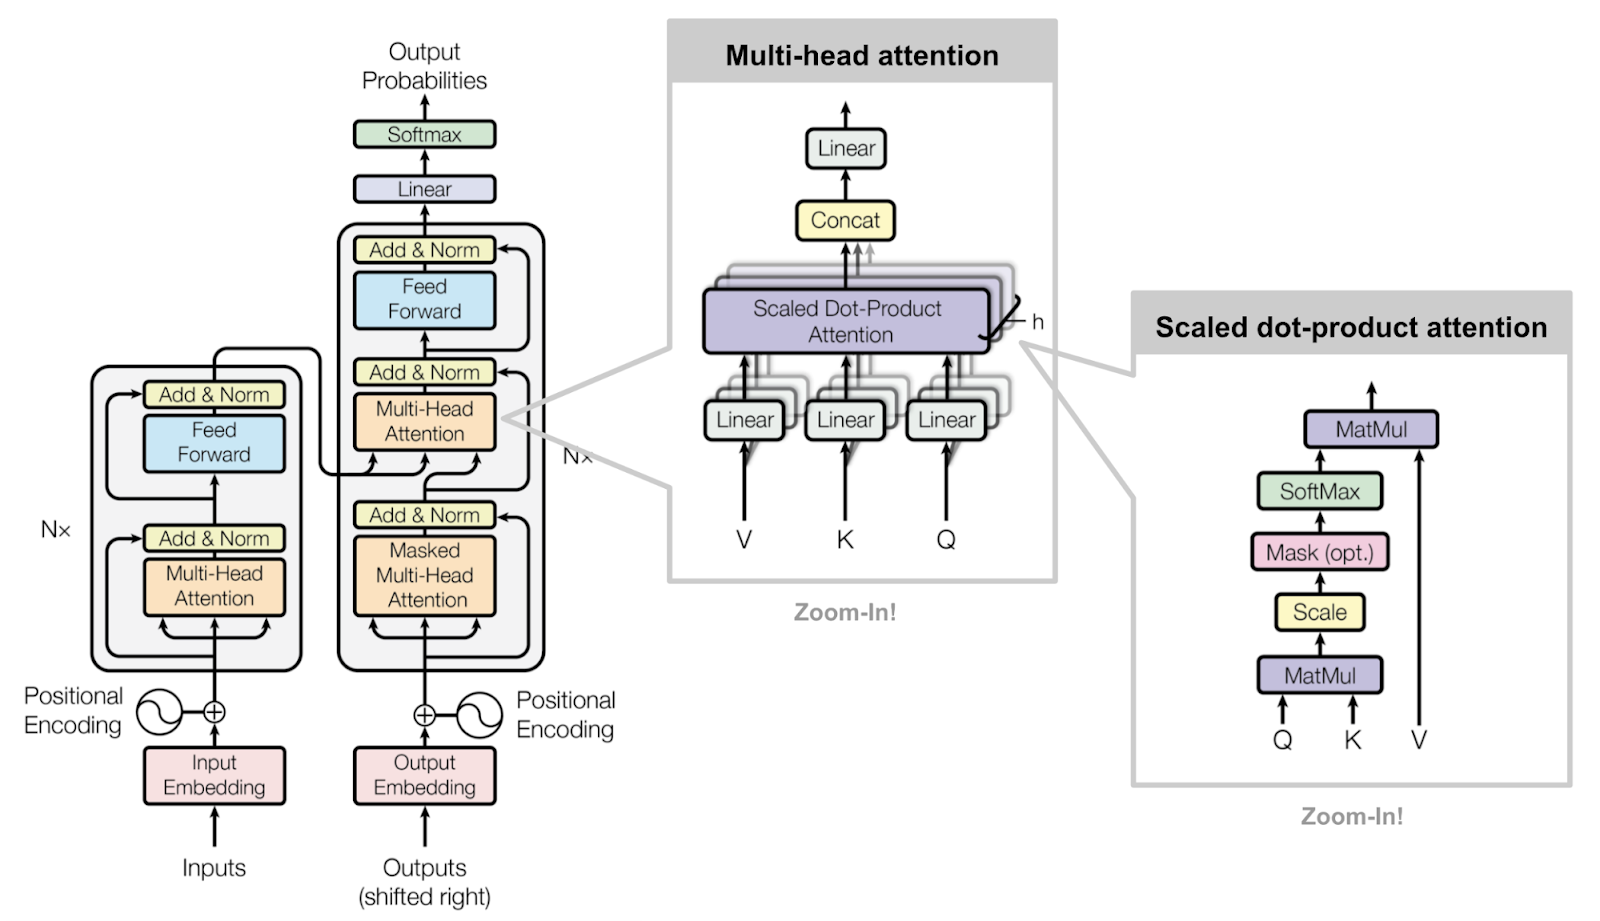

## Как и в случае любого NLP-приложения, мы начинаем с того, что преобразуем слово в вектор, используя алгоритм эмбеддингов слов (word embeddings).

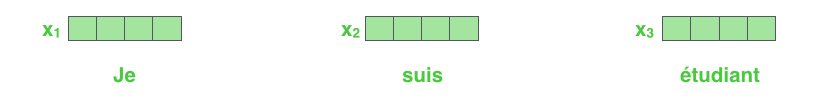

## Каждое слово преобразовывается в вектор размерностью 512. Мы будем изображать эти векторы с помощью простых квадратиков.

## Эмбеддинги применяются только в самом нижнем энкодере. На уровне абстракции, общей для всех энкодеров, происходит следующее: энкодеры получают набор векторов размерностью 512 (для самого нижнего энкодера это будут эмбеддинги слов, для других – выходные вектора нижестоящих энкодеров). Размер этого набора векторов является гиперпараметром, который мы можем устанавливать, и, по сути, равен длине самого длинного предложения в обучающем корпусе.

## После того как слова входящего предложения преобразовались в эмбеддинги, каждый из них в отдельности проходит через два слоя энкодера.

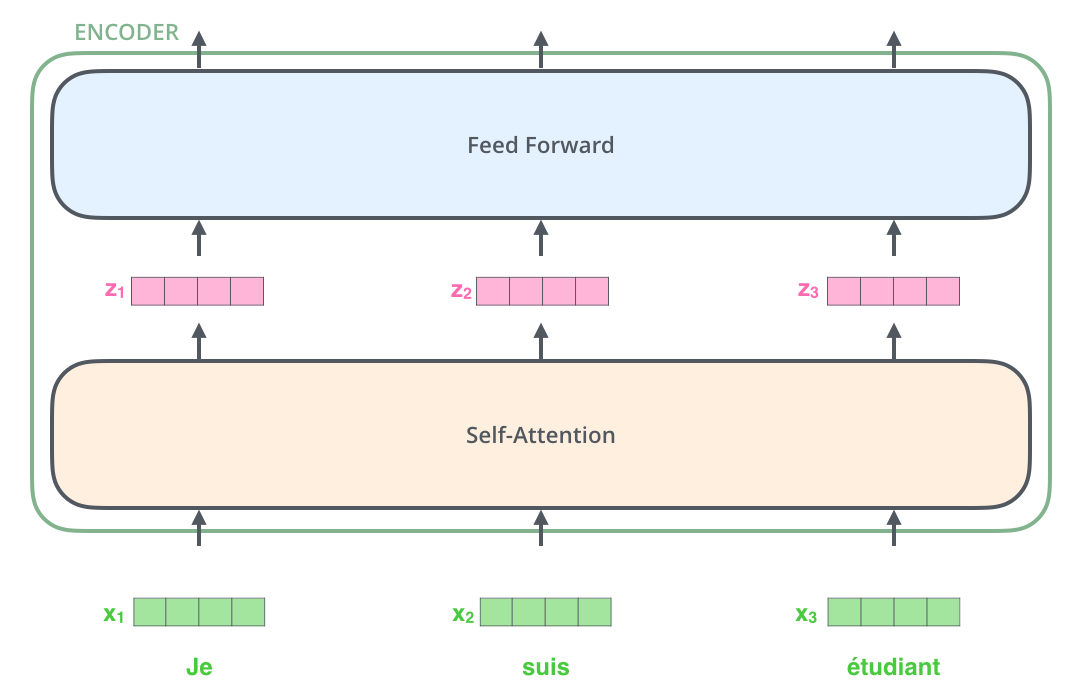

## **Что за Self-Attention** (**Механизм внутреннего внимания**)

## Для того чтобы получить выходной вектор **yⁱ** механизм внутреннего внимания просто вычисляет среднее взвешенное значение по всем входным векторам:

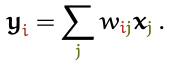

## Здесь индекс **j** проходится по всей последовательности, а сумма весов по всем значениям **j** равняется 1. Вес **Wij** — это не параметр, как в обычных нейронных сетях. Он является результатом применения особой функции к **xⁱ** и **Xj** Простейший вариант такой функции — скалярное произведение:

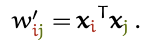

## Обратите внимание на то, что **Xi** — это входной вектор в той же позиции, что и текущий выходной вектор **Yi** Для следующего выходного вектора мы получаем совершенно новую последовательность скалярных произведений и другую взвешенную сумму.

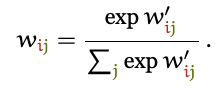

## Именно так и работает механизм внутреннего внимания.

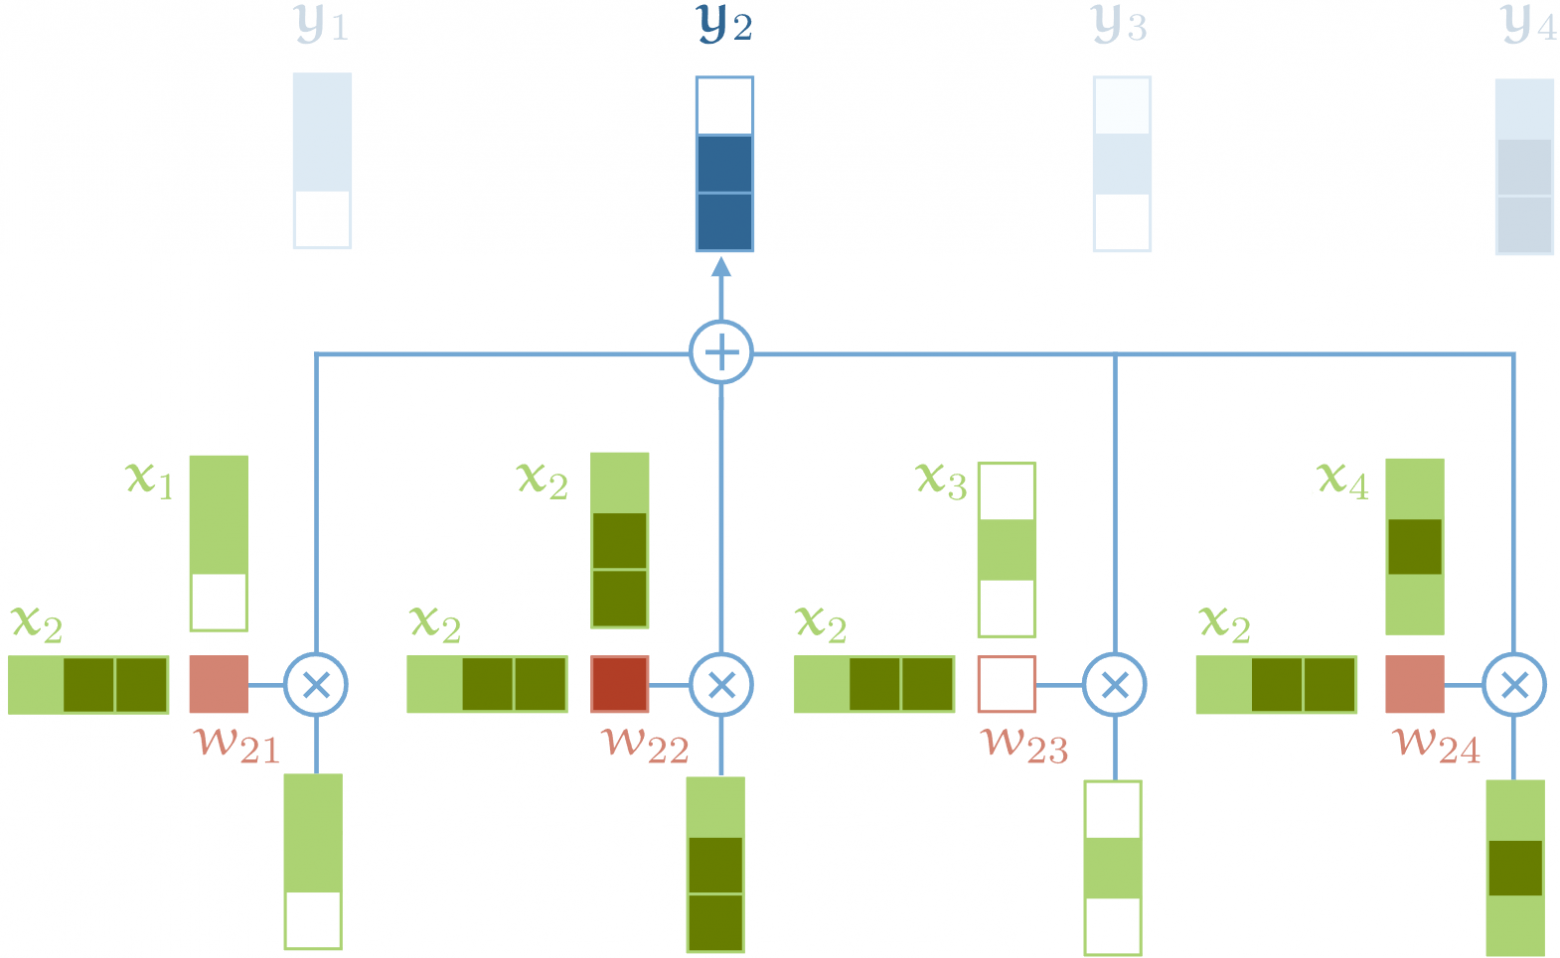

## ***По сути, BERT – это обученный стек энкодеров Трансформера.***
## У обеих моделей BERT'а есть большое количество слоев энкодера (которые в статье называются «блоками Трансформера» (Transformer Blocks)): 12 для базовой версии и 24 для расширенной. Они также имеют более крупные слои сети прямого распространения (768 и 1024 скрытых нейронов соответственно) и больше «голов» внимания (attention heads)(12 и 16 соответственно), чем в базовой конфигурации Трансформера, описанной в исходной статье (6 слоев энкодера, 512 скрытых нейронов, 8 «голов» внимания).

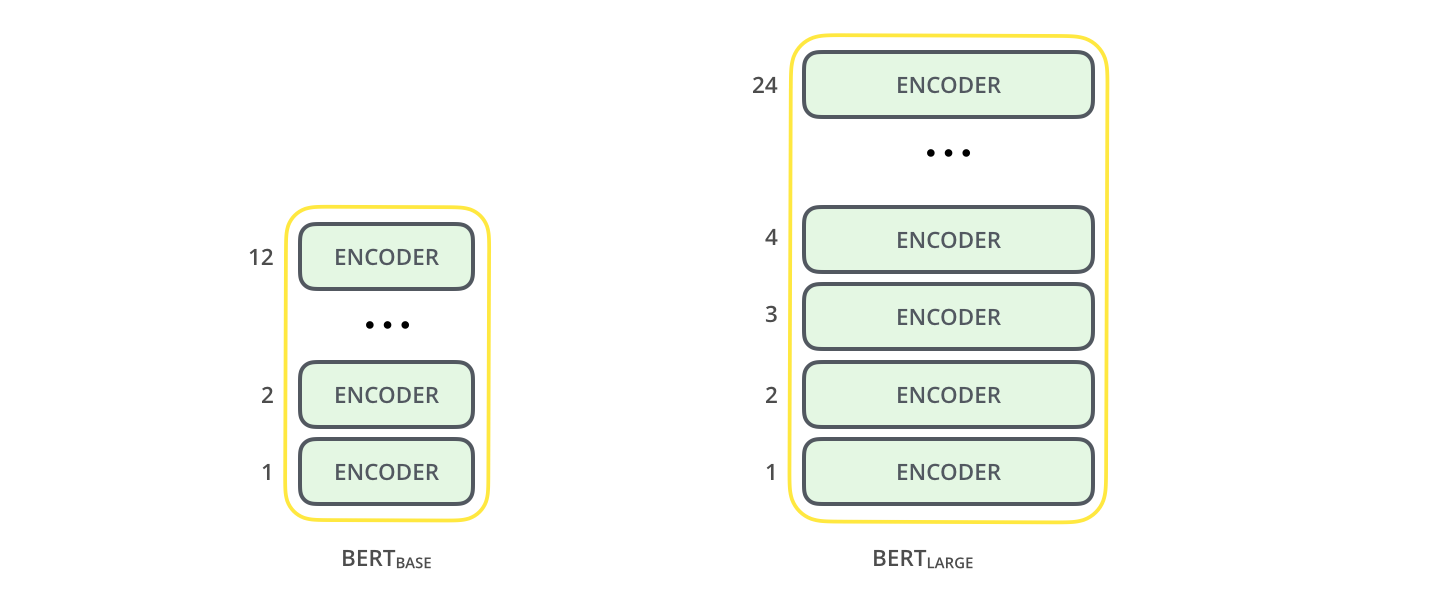

## Точно так же, как и в обычном Трансформере, BERT принимает на вход последовательность слов, которая затем продвигается вверх по стеку экодеров. Каждый слой энкодера применяет внутреннее внимание (self-attention) и передает результаты в сеть прямого распространения, после чего направляет его следующему энкодеру.

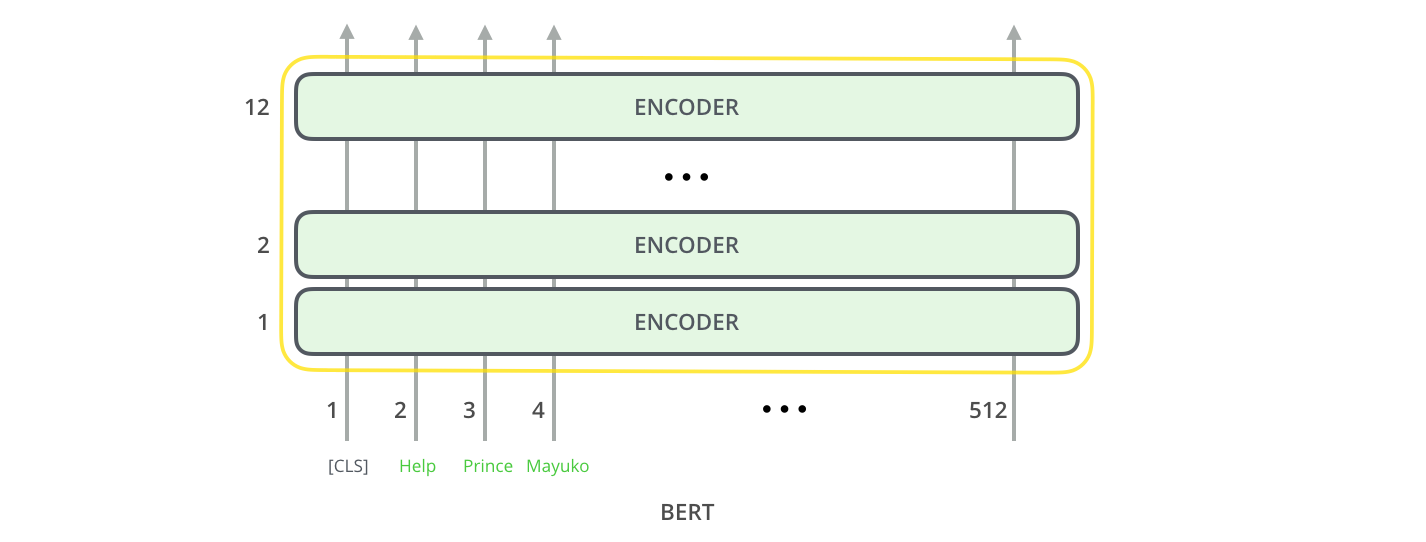

## Представления на входе и выходе
## Чтобы BERT научился обрабатывать различные задачи, на входе можно подавать как одно, так и пару предложений в одной и той же последовательности токенов. Модель использует эмбеддинг WordPiece со словарным запасом в 30 000 токенов. Первый токен в каждой последовательности — это специальный токен для классификации предложения [CLS], окончательное скрытое состояние которого используется в качестве представления совокупной последовательности для задач классификации. Предложения в последовательности различают двумя способами. Можно разделять их с помощью специального токена [SEP], а можно добавить заученный эмбеддинг к каждому токену, чтобы указать, принадлежит ли он предложению A или предложению B. Последний скрытый вектор специального токена обозначается как C, а последний скрытый вектор некоторого входного токена i обозначается как Ti.

## Для данного токена его входное представление строится путем суммирования соответствующих эмбеддингов токена, сегмента и позиции.

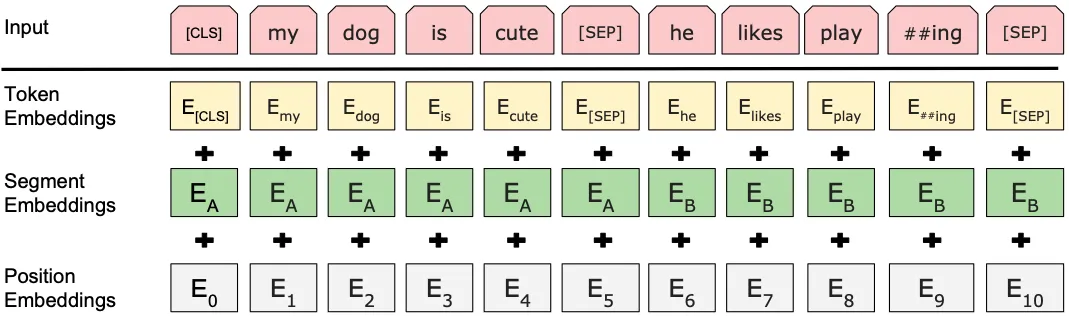

## [Unk]
## [Mask]

In [ ]:
# [Mask] - 15%  (80% - замена слова на <mask>)
# 1.5% - random word - делаем замену на рандомное слово 
# 1.5% - оставляем как есть

## SoftMax функция

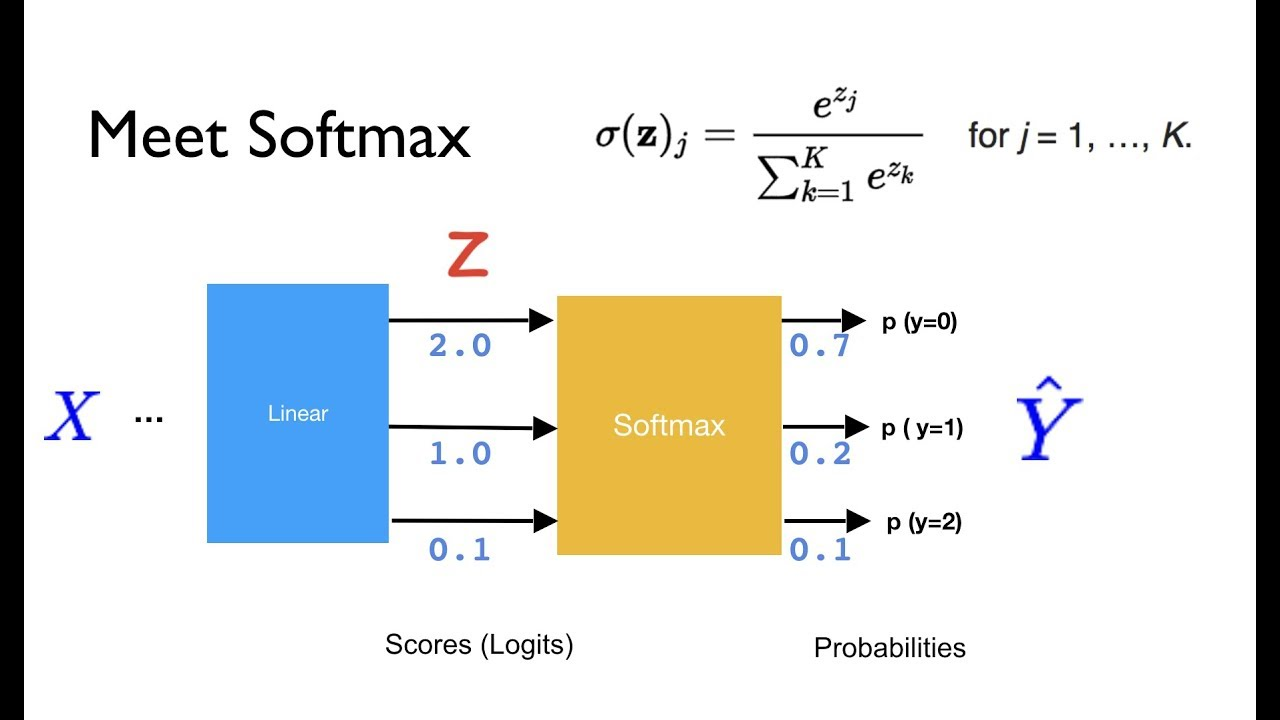

## Процесс обучения **BERT** включает **2** этапа:

## **1. Предварительное обучение** — модель обучается на немаркированных данных, выполняя различные задачи. Обычно не делается - уже есть готовые, так называемые предобученные модели, которые можно скачать и использовать уже на 2м этапе (Fine Tuning). 
---
## ***НО! Если вы хотите достичь лучшего результата на ВАШИХ данных - вы просто ОБЯЗАНЫ обучить вашу собственную модель на том домене текстов, на котором будет в дальнейшем решаться конечная задача (например, задача извлечения именованных сущностей NER). Это очень сильно добавит вам в метрике качества для решаемой вами задачи. Иначе хорошего качества добиться будет невозможно, независимо от подхода.Особенно актуально для русского языка и например таких специфичных текстов, как юридические документы или медицинские тексты.***
---
## **2. Точная настройка (Fine Tuning)** — модель загружается с предварительно обученными параметрами и обучается на помеченных данных из последующих задач.

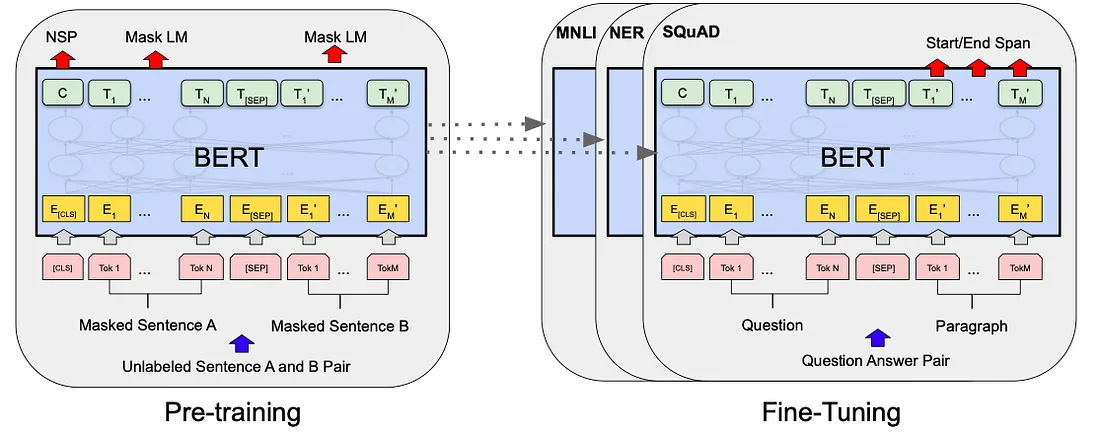

### ***Ссылки по теме:***
*   ### [BERT — коротко о главном](https://medium.com/nuances-of-programming/bert-%D0%BA%D0%BE%D1%80%D0%BE%D1%82%D0%BA%D0%BE-%D0%BE-%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%BE%D0%BC-23b56b0c5cd5#:~:text=BERT%20(Bidirectional%20Encoder%20Representation%20Transformers,%D0%BF%D1%83%D1%82%D0%B5%D0%BC%20%D1%81%D0%BE%D0%B2%D0%BC%D0%B5%D1%89%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BB%D0%B5%D0%B2%D0%BE%D0%B3%D0%BE%20%D0%B8%20%D0%BF%D1%80%D0%B0%D0%B2%D0%BE%D0%B3%D0%BE)
*   ### [BERT – универсальный инструмент NLP. Лекция 6 по обработке естественного языка.](https://www.youtube.com/watch?v=YJZNBPzHRFY&ab_channel=%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9%D0%A0%D0%B0%D0%B7%D0%B8%D0%BD%D0%BA%D0%BE%D0%B2)
*   ### [Трансформер, часть 1. Лекция 4 по NLP](https://www.youtube.com/watch?v=k7o-QKMFyLg&list=PL6-BrcpR2C5SX54rRkRoPI-JuGzlQFDUR&index=4&ab_channel=%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9%D0%A0%D0%B0%D0%B7%D0%B8%D0%BD%D0%BA%D0%BE%D0%B2)
*   ### [Трансформер, часть 2. Архитектура. Лекция 5 по NLP](https://www.youtube.com/watch?v=ro18G_y0PuQ&ab_channel=%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9%D0%A0%D0%B0%D0%B7%D0%B8%D0%BD%D0%BA%D0%BE%D0%B2)
*   ### [Лекция. Elmo, GPT, BERT](https://www.youtube.com/watch?v=zhsUpUFClEU&ab_channel=DeepLearningSchool)
*   ### [Лекция: Архитектуры NLP, Transformer, Bert. (10.04.2020)](https://www.youtube.com/watch?v=UEQ-XDDILls&ab_channel=DeepLearningSchool)
*   ### [Лекция 21. Архитектура "Transformer" для sequence-to-sequence](https://www.youtube.com/watch?v=ONuRVpJSvfY&ab_channel=ComputerScienceCenter)
*   ### [BERT для классификации русскоязычных текстов](https://habr.com/ru/post/567028/)


## **4. Примеры применения**

# Примеры решения задач обработки естественного языка с использованием библиотеки HuggingFace
### [Hugging Face](https://huggingface.co/)

## ***Определение тональности текста***
### Создаем пайплайн для решения задачи обработки естественного языка и используем пайплайн для определения тональности текста.
### *Устанавливаем и подключаем необходимые библиотеки:*

In [1]:
!pip install -q transformers sentencepiece sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.0 MB/s eta 0:00:00


In [2]:
import transformers
from transformers import pipeline

transformers.logging.set_verbosity_error()

classifier = pipeline("sentiment-analysis")
results = classifier("— Брысь! — громко произнес мистер Дурсль.")

# Просматриваем результаты
results

[{'label': 'POSITIVE', 'score': 0.6511370539665222}]

## ***Создаем пайплайн для определения тональности текста на русском языке.*** 
### Модель [RuBERT for Sentiment Analysis](https://huggingface.co/blanchefort/rubert-base-cased-sentiment).

In [4]:
# Используем пайплайн для определения тональности текста на русском языке.
classifier = pipeline("sentiment-analysis", 
                      model="blanchefort/rubert-base-cased-sentiment")

# Инференс
results = classifier("Мне нравится спорт.")
results

[{'label': 'POSITIVE', 'score': 0.9805594682693481}]

## ***Классификация текста – определение токсичности***

In [5]:
classifier = pipeline("text-classification", 
                      model="SkolkovoInstitute/russian_toxicity_classifier")
results = classifier("— Ух, ты моя крошка, — со смехом выдавил из себя мистер Дурсль, выходя из дома.")
results

[{'label': 'toxic', 'score': 0.8645299673080444}]

## ***Автоматический перевод***

In [6]:
translator = pipeline("translation_ru_to_en", model="Helsinki-NLP/opus-mt-ru-en")
results = translator("Мистер Дурсль отвернулся и поехал дальше, продолжая следить за кошкой в зеркало заднего вида.")
results

[{'translation_text': 'Mr. Dursle turned his back and moved on, keeping an eye on the cat in the rearview mirror.'}]

## ***Автоматическая генерация текста***

In [7]:
generator = pipeline('text-generation', 
                     model="sberbank-ai/rugpt3large_based_on_gpt2")
results = generator("""На углу улицы мистер Дурсль заметил, что происходит что-то странное, — 
                        на тротуаре стояла кошка и внимательно изучала лежащую перед ней карту.""", 
                    max_length = 100)
print(results)
results[0]['generated_text']

[{'generated_text': 'На углу улицы мистер Дурсль заметил, что происходит что-то странное, — \n                        на тротуаре стояла кошка и внимательно изучала лежащую перед ней карту. \n\n— Что это за кошка? — спросил он. \n\n— Это кошка, — ответил мистер Дурсль. — Она не кошка, а кошка. \n\n— А что она делает? \n\n— Она изучает карту. \n\n— А что она изучает? \n\n— Она изучает карту. \n\n—'}]


'На углу улицы мистер Дурсль заметил, что происходит что-то странное, — \n                        на тротуаре стояла кошка и внимательно изучала лежащую перед ней карту. \n\n— Что это за кошка? — спросил он. \n\n— Это кошка, — ответил мистер Дурсль. — Она не кошка, а кошка. \n\n— А что она делает? \n\n— Она изучает карту. \n\n— А что она изучает? \n\n— Она изучает карту. \n\n—'

## ***Ответы на вопросы***

In [8]:
qa_model = pipeline("question-answering", 
                    model="AlexKay/xlm-roberta-large-qa-multilingual-finedtuned-ru")

context = """Семья Дурслей имела всё, чего только можно пожелать. Но был у них и один секрет. 
Причем больше всего на свете они боялись, что кто-нибудь о нем узнает. 
Дурсли даже представить себе не могли, что с ними будет, если выплывет правда о Поттерах. 
Миссис Поттер приходилась миссис Дурсль родной сестрой, но они не виделись вот уже несколько лет. 
Миссис Дурсль даже делала вид, что у нее вовсе нет никакой сестры, потому что сестра и её никчемный муж были полной противоположностью Дурслям."""

# Вопрос
question = "Кем приходилась миссис Поттер миссис Дурсль?"

# Результат в BIO-tagging формате
results = qa_model(question = question, context = context)
results

{'score': 0.7447059154510498,
 'start': 284,
 'end': 300,
 'answer': ' родной сестрой,'}

## ***Извлечение именованных сущностей***

In [9]:
classifier = pipeline("ner", model="Babelscape/wikineural-multilingual-ner")

results = classifier("""Мистер Дурсль потряс головой и попытался выбросить из нее кошку. 
                        И пока его автомобиль ехал к Лондону из пригорода, мистер Дурсль думал о крупном заказе на дрели, 
                        который рассчитывал сегодня получить.""")
results

[{'entity': 'B-PER',
  'score': 0.67116123,
  'index': 1,
  'word': 'Ми',
  'start': 0,
  'end': 2},
 {'entity': 'B-PER',
  'score': 0.35897133,
  'index': 2,
  'word': '##стер',
  'start': 2,
  'end': 6},
 {'entity': 'I-PER',
  'score': 0.86338747,
  'index': 3,
  'word': 'Д',
  'start': 7,
  'end': 8},
 {'entity': 'I-PER',
  'score': 0.9679396,
  'index': 4,
  'word': '##урс',
  'start': 8,
  'end': 11},
 {'entity': 'I-PER',
  'score': 0.93500066,
  'index': 5,
  'word': '##ль',
  'start': 11,
  'end': 13},
 {'entity': 'B-LOC',
  'score': 0.99889153,
  'index': 32,
  'word': 'Лондон',
  'start': 119,
  'end': 125},
 {'entity': 'I-LOC',
  'score': 0.9831807,
  'index': 33,
  'word': '##у',
  'start': 125,
  'end': 126},
 {'entity': 'B-PER',
  'score': 0.62643844,
  'index': 39,
  'word': 'ми',
  'start': 141,
  'end': 143},
 {'entity': 'I-PER',
  'score': 0.838973,
  'index': 41,
  'word': 'Д',
  'start': 148,
  'end': 149},
 {'entity': 'I-PER',
  'score': 0.96217686,
  'index': 42,
 

## Полезные ссылки

1. [Библиотека Hugging Face](https://huggingface.co/course/chapter1/3?fw=pt)
2. [Модели машинного обучения в библиотеке Hugging Face](https://huggingface.co/models)
3. [Задачи обработки естественного языка в библиотеке Hugging Face](https://huggingface.co/tasks)
3. [RuBERT for Sentiment Analysis](https://huggingface.co/blanchefort/rubert-base-cased-sentiment)
4. [Модель определения токсичности русскоязычных комментариев](https://huggingface.co/SkolkovoInstitute/russian_toxicity_classifier)
4. [BIO tagging](https://habr.com/ru/company/contentai/blog/449514/)

# **руберт от Сбера**

## Модели ruT5 — ruBERT — ruRoBERTa для нашего зоопарка русскоязычных архитектур: sequence2sequence модель (ruT5); и два encoder’а (ruBERT, ruRoBERTa) в добавление к decoder’у (ruGPT-2, ruGPT-3).

## Модели представлены в разных вариациях: base и large. Для ruRoBERTa – только large.

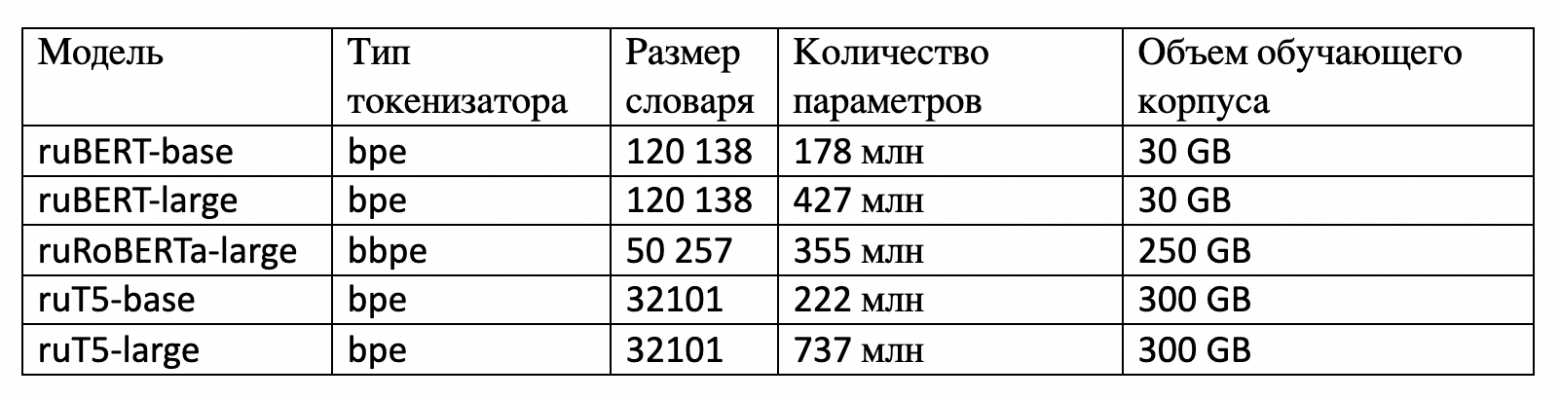

In [9]:
!pip install -q datasets transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 12.5 MB/s eta 0:00:00


# ruRoberta large 
fill-mask task

[Roberta paper](https://arxiv.org/abs/1907.11692)
- Large: [HF Model API](https://huggingface.co/sberbank-ai/ruRoberta-large)



In [10]:
from transformers import pipeline

unmasker = pipeline("fill-mask", 
                    model="sberbank-ai/ruRoberta-large")
unmasker("Евгений Понасенков назвал <mask> величайшим маэстро.", top_k=1)


[{'score': 0.5433037877082825,
  'token': 830,
  'token_str': ' себя',
  'sequence': 'Евгений Понасенков назвал себя величайшим маэстро.'}]

In [11]:
# ruRoberta-large example
from transformers import pipeline

unmasker = pipeline("fill-mask", model="sberbank-ai/ruRoberta-large")
[i['sequence'] for i in unmasker("Разработчикам стоит чаще обсуждать <mask> на Хабре.", top_k=5)]


['Разработчикам стоит чаще обсуждать игры на Хабре.',
 'Разработчикам стоит чаще обсуждать это на Хабре.',
 'Разработчикам стоит чаще обсуждать проекты на Хабре.',
 'Разработчикам стоит чаще обсуждать разработки на Хабре.',
 'Разработчикам стоит чаще обсуждать тему на Хабре.']

In [12]:
# ruRoberta-large example 
from transformers import RobertaForMaskedLM,RobertaTokenizer, pipeline

model=RobertaForMaskedLM.from_pretrained('sberbank-ai/ruRoberta-large')

tokenizer=RobertaTokenizer.from_pretrained('sberbank-ai/ruRoberta-large')

unmasker = pipeline('fill-mask', model=model,tokenizer=tokenizer)
unmasker("Стоит чаще писать на Хабр про <mask>.")

[{'score': 0.09717968851327896,
  'token': 473,
  'token_str': ' это',
  'sequence': 'Стоит чаще писать на Хабр про это.'},
 {'score': 0.055305033922195435,
  'token': 23461,
  'token_str': ' ЕР',
  'sequence': 'Стоит чаще писать на Хабр про ЕР.'},
 {'score': 0.0376366451382637,
  'token': 6533,
  'token_str': ' Россию',
  'sequence': 'Стоит чаще писать на Хабр про Россию.'},
 {'score': 0.033577676862478256,
  'token': 17127,
  'token_str': ' космос',
  'sequence': 'Стоит чаще писать на Хабр про космос.'},
 {'score': 0.03199942782521248,
  'token': 5092,
  'token_str': ' Крым',
  'sequence': 'Стоит чаще писать на Хабр про Крым.'}]

In [13]:
# ruRoberta-large example 
from transformers import RobertaForMaskedLM,RobertaTokenizer, pipeline

model=RobertaForMaskedLM.from_pretrained('sberbank-ai/ruRoberta-large')

tokenizer=RobertaTokenizer.from_pretrained('sberbank-ai/ruRoberta-large')

unmasker = pipeline('fill-mask', model=model,tokenizer=tokenizer)
unmasker("Привет! Я модель ruRoberta. Я много знаю про <mask>.")

[{'score': 0.1189907118678093,
  'token': 998,
  'token_str': ' тебя',
  'sequence': 'Привет! Я модель ruRoberta. Я много знаю про тебя.'},
 {'score': 0.06967200338840485,
  'token': 1118,
  'token_str': ' вас',
  'sequence': 'Привет! Я модель ruRoberta. Я много знаю про вас.'},
 {'score': 0.049427330493927,
  'token': 6533,
  'token_str': ' Россию',
  'sequence': 'Привет! Я модель ruRoberta. Я много знаю про Россию.'},
 {'score': 0.025075463578104973,
  'token': 5462,
  'token_str': ' футбол',
  'sequence': 'Привет! Я модель ruRoberta. Я много знаю про футбол.'},
 {'score': 0.020422011613845825,
  'token': 17249,
  'token_str': ' дизайн',
  'sequence': 'Привет! Я модель ruRoberta. Я много знаю про дизайн.'}]

# ruT5 large & base 
Text2Text Generation

[T5 paper](https://arxiv.org/abs/1910.10683)
 - Large: [HF Model API](https://huggingface.co/sberbank-ai/ruT5-large)
 - Base: [HF Model API](https://huggingface.co/sberbank-ai/ruT5-base)

 [Model parameters](https://huggingface.co/transformers/model_doc/t5.html)

In [14]:
from transformers import pipeline

generator = pipeline("text2text-generation", model="sberbank-ai/ruT5-base")
generator(
    "Текст: С мая 2021 в России повысят налоги. Тема: "
)

[{'generated_text': '::)'}]

In [ ]:
# ruT5-large example 
from transformers import T5ForConditionalGeneration,T5Tokenizer

model=T5ForConditionalGeneration.from_pretrained('sberbank-ai/ruT5-large')

tokenizer=T5Tokenizer.from_pretrained('sberbank-ai/ruT5-large',)
input_ids = tokenizer('Снижение цен <extra_id_0> в Москве возможно только при <extra_id_1>. Это условие названо в аналитической заметке агентства <extra_id_2>, поступившей в редакцию <extra_id_3>', return_tensors='pt').input_ids

out_ids=model.generate(input_ids=input_ids,
                        max_length=30,
                        eos_token_id=tokenizer.eos_token_id, 
                        early_stopping=True)

tokenizer.decode(out_ids[0][1:])

# ruBert large & base 
Fill-mask

[T5 paper](https://arxiv.org/abs/1810.04805)
 - Large: [HF Model API](https://huggingface.co/sberbank-ai/ruBert-large)
 - Base: [HF Model API](https://huggingface.co/sberbank-ai/ruBert-base)

In [ ]:
# ruBert-base example 
from transformers import BertForMaskedLM,BertTokenizer, pipeline

model = BertForMaskedLM.from_pretrained('sberbank-ai/ruBert-base')
tokenizer = BertTokenizer.from_pretrained('sberbank-ai/ruBert-base', do_lower_case=False)
unmasker = pipeline('fill-mask', model=model,tokenizer=tokenizer)

[i['sequence'] for i in unmasker("Python -  это самый [MASK] язык программирования.")]

In [ ]:
# ruBert-base example 
from transformers import BertForMaskedLM,BertTokenizer, pipeline

model = BertForMaskedLM.from_pretrained('sberbank-ai/ruBert-base')

tokenizer = BertTokenizer.from_pretrained('sberbank-ai/ruBert-base', do_lower_case=False)

unmasker = pipeline('fill-mask', model=model,tokenizer=tokenizer)
unmasker("Привет! Я модель bert. Я много знаю про [MASK] язык.")

# ruGPT3 large & medium & small 
Text Generation

[GPT3 paper](https://arxiv.org/abs/2005.14165)
 - Large: [HF Model API](https://huggingface.co/sberbank-ai/rugpt3large_based_on_gpt2)
 - Medium: [HF Model API](https://huggingface.co/sberbank-ai/rugpt3medium_based_on_gpt2)
 - Small: [HF Model API](https://huggingface.co/sberbank-ai/rugpt3small_based_on_gpt2)

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="sberbank-ai/rugpt3small_based_on_gpt2")
generator(
    "Я этом курсе мы научимся",
    max_length=30,
    num_return_sequences=1,
)

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation",
                     model="sberbank-ai/rugpt3medium_based_on_gpt2")
generator(
    "Никогда не мойте руки, шею, уши и лицо - ",
    max_length=100,
    num_return_sequences=1,
    clean_up_tokenization_spaces=True
)

[ruT5, ruRoBERTa, ruBERT: как мы обучили серию моделей для русского языка](https://habr.com/ru/company/sberbank/blog/567776/)

## **Про леммитизацию: Pymorphy и mystem. При построении модели в какой последовательности все делать: векторизацию, леммитизацию. Когда делить на подвыборки. В тренажере нам сразу давались два файла test и train. А в проекте целый датасэт.**

In [1]:
!pip install -q pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 65.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer(lang='ru')

Основной механизм анализатора - это метод parse, который делает морфологический разбор слова. Если разборов много, то можно выбрать подходящий вариант. Каждый разбор представляет из себя объект Parse, содержащий теги OpenCorpora, нормализованную лексему, скоринг разбора и алгоритм разбора (слово найдено в словаре OpenCorpora, сравнение по известному окончанию и т. д).



In [4]:
morph.parse('механизм')

[Parse(word='механизм', tag=OpencorporaTag('NOUN,inan,masc sing,nomn'), normal_form='механизм', score=0.625, methods_stack=((DictionaryAnalyzer(), 'механизм', 34, 0),)),
 Parse(word='механизм', tag=OpencorporaTag('NOUN,inan,masc sing,accs'), normal_form='механизм', score=0.375, methods_stack=((DictionaryAnalyzer(), 'механизм', 34, 3),))]

Чтобы получить теги OpenCorpora отдельно, стоит применить к слову метод tag.

In [5]:
morph.parse('механизм')[0].tag.POS # часть речи

'NOUN'

In [6]:
morph.parse('механизм')[0].tag.cyr_repr # часть речи

'СУЩ,неод,мр ед,им'

In [7]:
morph.parse('механизм')[0].tag.gender # род

'masc'

In [8]:
morph.lat2cyr('masc')

'мр'

In [9]:
morph.parse('механизм')[0].tag. number # число

'sing'

In [10]:
morph.parse('механизм')[0].tag.case # падеж

'nomn'

In [11]:
morph.parse('стали')

[Parse(word='стали', tag=OpencorporaTag('VERB,perf,intr plur,past,indc'), normal_form='стать', score=0.975342, methods_stack=((DictionaryAnalyzer(), 'стали', 945, 4),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,gent'), normal_form='сталь', score=0.010958, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 1),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,nomn'), normal_form='сталь', score=0.005479, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 6),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,datv'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 2),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn sing,loct'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 5),)),
 Parse(word='стали', tag=OpencorporaTag('NOUN,inan,femn plur,accs'), normal_form='сталь', score=0.002739, methods_stack=((DictionaryAnalyzer(), 'стали', 13, 9),))]

## **Как юзать tokenizer и dictionary в Catboost**

In [12]:
!pip install -q catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.2 MB/s eta 0:00:00


In [13]:
from catboost.text_processing import Tokenizer

text = "Still, I would love to see you at 12, if you don't mind"

tokenized = Tokenizer(lowercasing=True,
                      separator_type='BySense',
                      token_types=['Word', 'Number']).tokenize(text)

print(tokenized)

['still', 'i', 'would', 'love', 'to', 'see', 'you', 'at', '12', 'if', 'you', "don't", 'mind']


## [Tokenizer CatBoost](https://catboost.ai/en/docs/concepts/python-reference_tokenizer)

In [15]:
from catboost.text_processing import Dictionary

dictionary = Dictionary(occurence_lower_bound=0).fit(tokenized)

tokens = dictionary.get_top_tokens(14)
print(tokens)

dictionary.save("Словарь.txt")

['you', '12', 'at', "don't", 'i', 'if', 'love', 'mind', 'see', 'still', 'to', 'would']


## [Dictionary CatBoost](https://catboost.ai/en/docs/concepts/python-reference_dictionary)